Observations
- Error does not converge well with altmin + discrim training simultaneously
- Deblur seems to have little effect - further investigation needed

In [1]:
import sys 
sys.path.append('..')
import matplotlib.pyplot as plt
from glob import glob
import ra
import numpy as np
import pylab 
import scipy.stats as stats
from utils import *

def show_images(images, cols = 1):
    n_images = len(images)
    fig = plt.figure()
    for n, image in enumerate(images):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image, cmap='gray')
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

altmin only mean:  0.0562006
altmin only median:  0.0433483
discrim only mean:  2.88288
discrim only median:  1.4762


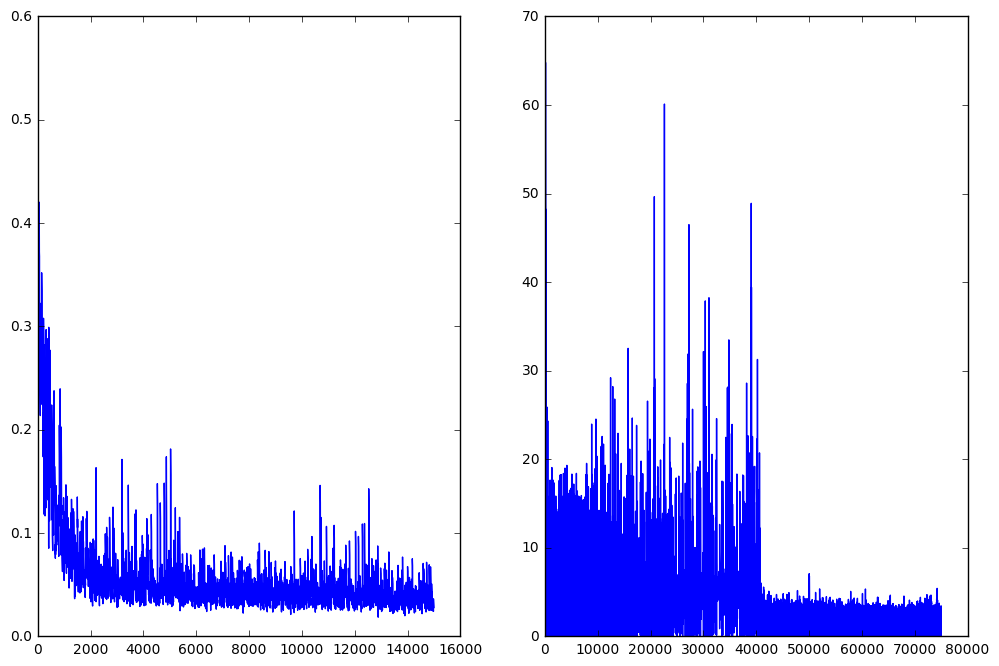

In [29]:
a = np.load('../recon_gan/checkpoints_comba/0000001499.npy')
print("altmin only mean: ", np.average(a))
print("altmin only median: ", np.median(a))
b = np.load('../recon_gan/checkpoints_combg/0000007499.npy')
print("discrim only mean: ", np.average(b[1]))
print("discrim only median: ", np.median(b[1]))
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(a)
fig.add_subplot(1, 2, 2)
plt.plot(b[1])
fig.set_size_inches(np.array(fig.get_size_inches()) * 2)
plt.show()

both (u = 0.5) loss
mean altmin:  0.437458
median altmin:  0.417994
mean discrim:  0.561366
median discrim:  0.0867277


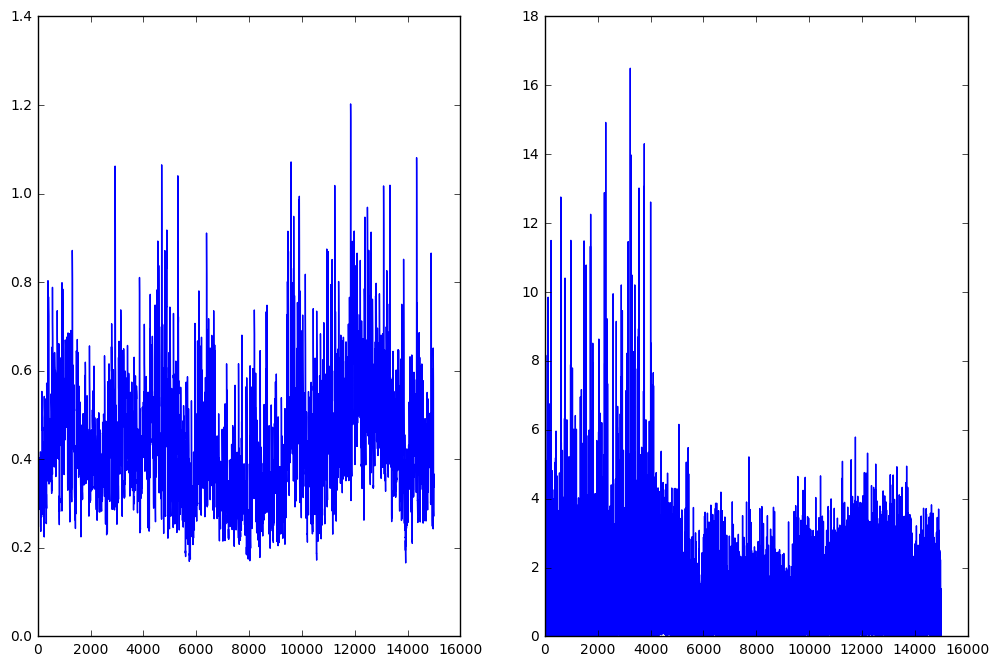

In [21]:
b = np.load('../recon_gan/checkpoints_comb/0000001499.npy')
print("both (u = 0.5) loss")
print("mean altmin: ", np.average(b[1]))
print("median altmin: ", np.median(b[1]))
print("mean discrim: ", np.average(b[2]))
print("median discrim: ", np.median(b[2]))
fig = plt.figure()
fig.add_subplot(1, 2, 1)
plt.plot(b[1])
fig.add_subplot(1, 2, 2)
plt.plot(b[2])
fig.set_size_inches(np.array(fig.get_size_inches()) * 2)
plt.show()

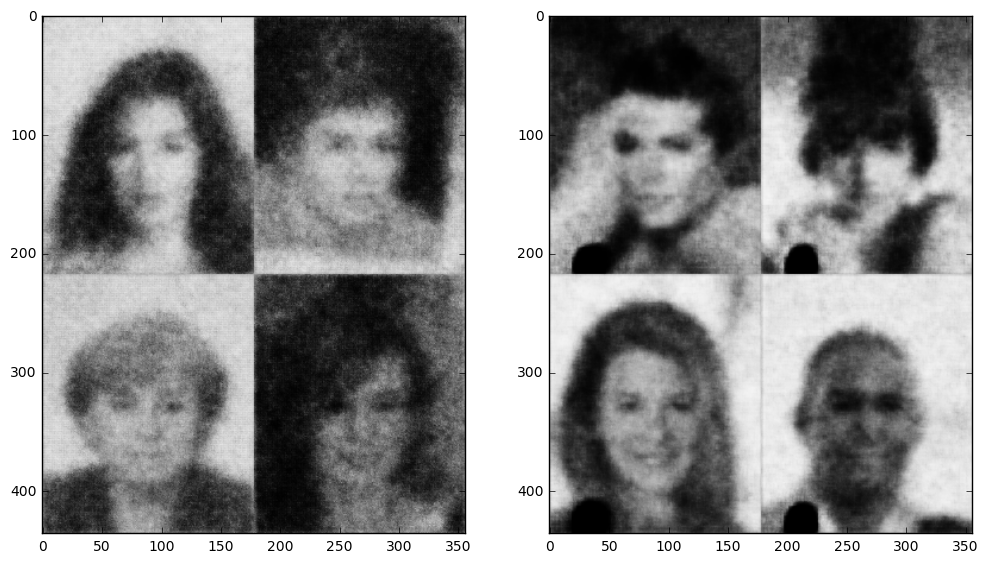

In [31]:
# using L1 instead of L2 for altmin loss

altmin = (glob("../recon_gan/samples_facel1/*.png"))[-2:]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

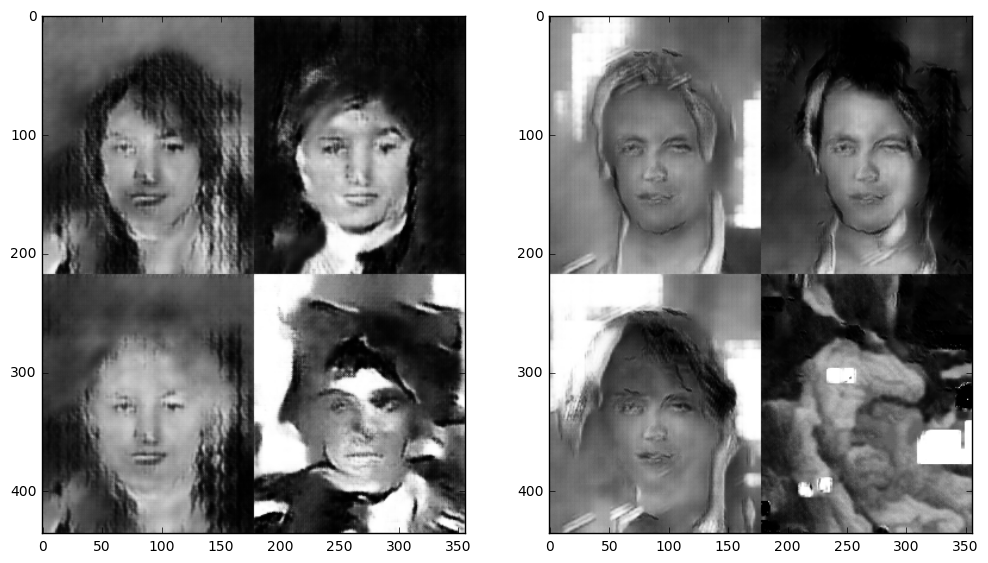

In [51]:
# attempts at combining altmin and gan loss (u = 0.5)
altmin = (glob("../recon_gan/samples_comb/*.png"))[-6:-4:]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

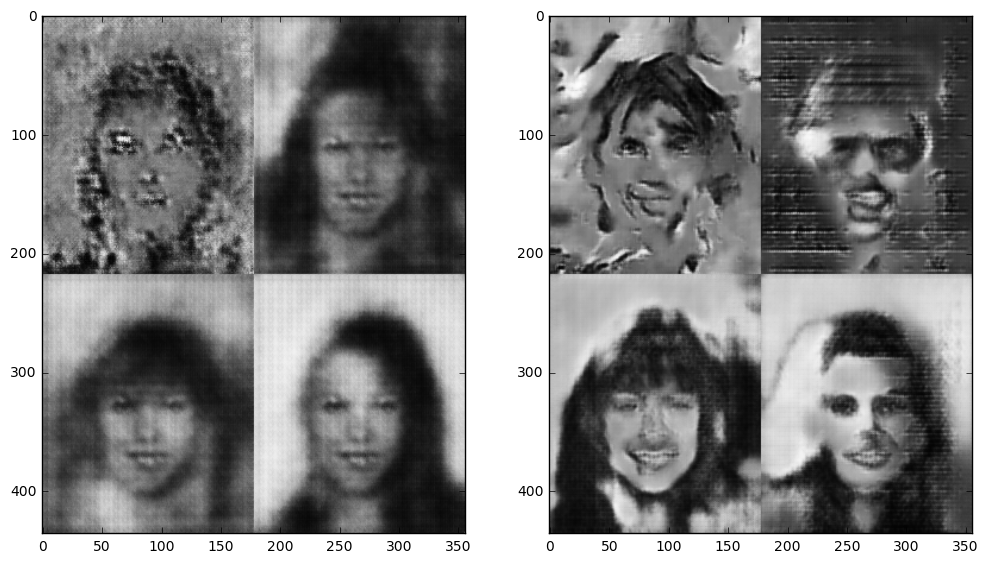

In [52]:
# attempts at combining altmin and gan loss (u = 0.9)
altmin = (glob("../recon_gan/samples_0.9comb/*.png"))[-6:-4]
altmin = [scipy.misc.imread(i) for i in altmin]
show_images(altmin)

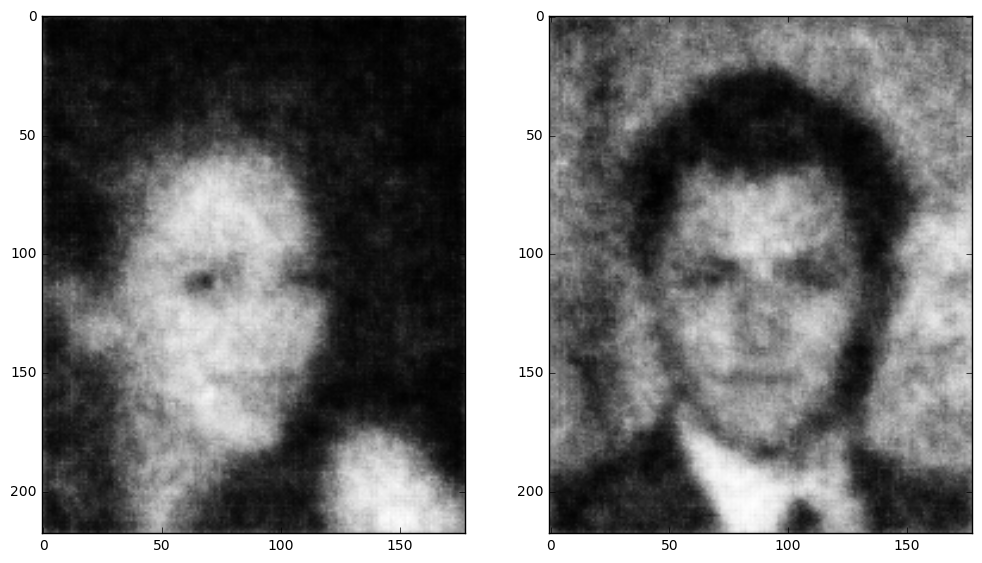

In [59]:
# deblur attempts with raisr: originals
img = sorted(glob("../recon_gan/samples_1amin/*s.png"))[-2:]
img = [scipy.misc.imread(i) for i in img]
show_images(img)

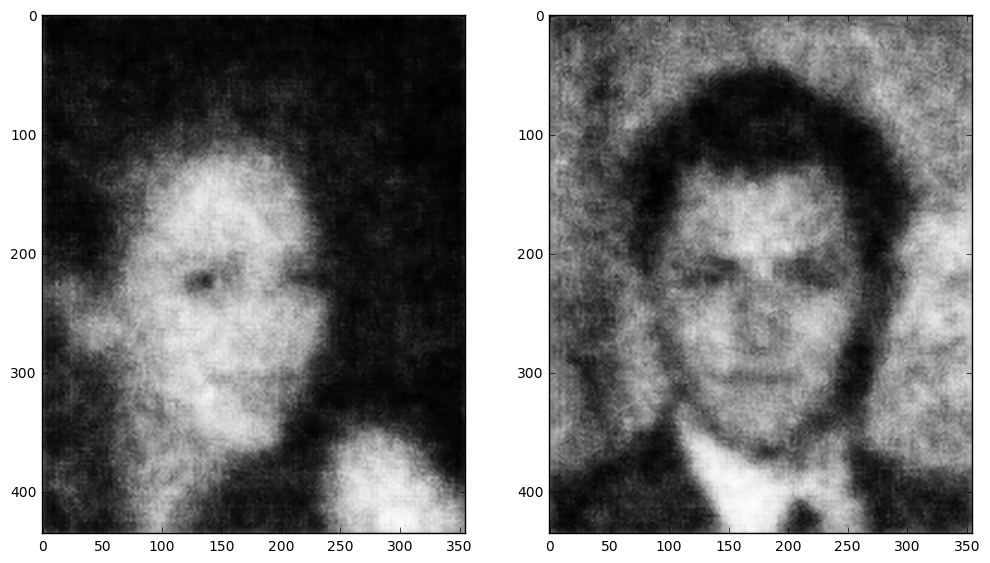

In [63]:
# deblur attempts with raisr: deblurred
img = sorted(glob("../recon_gan/samples_1amin/*t.bmp"))[-2:]
img = [scipy.misc.imread(i) for i in img]
show_images(img)